## Step 1 — Data Loading & Initial Inspection

In this step, the retail sales dataset is loaded to perform an initial inspection.  
The objective is to ensure that the data structure, column names, and overall format are correctly read before proceeding to deeper analysis.

Key validation at this stage includes:
- Verifying the number of rows and columns
- Ensuring all expected fields are present
- Checking for potential encoding or import issues

This step acts as a foundation to avoid downstream data integrity problems.

In [10]:
import pandas as pd

df = pd.read_csv("../data/retail_sales.csv", encoding="latin1")
# Load data with latin1 encoding due to non-UTF8 characters
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Step 2 — Data Structure & Schema Validation

This step focuses on validating the dataset schema to ensure that each column has the appropriate data type and contains complete records.

The following aspects are verified:
- Date fields are correctly identified and convertible to datetime format
- Numeric fields (Sales, Profit, Quantity, Discount) are properly recognized
- No critical business fields contain missing values

A clean and consistent schema is essential for accurate metric calculations and reliable business insights.

In [11]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [15]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Step 3 — Duplicate & Transaction Integrity Check

In this step, the dataset is checked for duplicate records that could distort key performance indicators such as total revenue or order volume.

Additionally, the uniqueness of Order IDs is reviewed to confirm that:
- Each order may consist of multiple line items
- Aggregations at the order level remain logically sound

Removing duplicates at this stage ensures analytical accuracy and prevents inflated metrics.

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df["Order Date"].nunique(),len(df)

(1237, 9994)

## Step 4 — Date Conversion & Time-Based Feature Engineering

This step converts order and shipment dates into datetime format and derives time-based features to support trend and operational analysis.

New features created include:
- Order Year
- Order Month (YYYY-MM format)
- Shipping Delay (in days)

These features enable time-series analysis, seasonal pattern identification, and logistics performance evaluation.

In [20]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.to_period("M").astype(str)
df["Ship Delay (Days)"] = (df["Ship Date"] - df["Order Date"]).dt.days

df[["Order Date","Ship Date","Ship Delay (Days)"]].head()
df["Ship Delay (Days)"].describe()

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Ship Delay (Days), dtype: float64

## Step 5 — Business Logic & Numerical Sanity Checks

Before generating business metrics, numerical fields are validated against logical business constraints.

The validation ensures that:
- Sales values are positive
- Discount rates fall within a realistic range (0–100%)
- Quantities are greater than zero
- Negative profit values are allowed and interpreted as losses

This step prevents misleading insights caused by corrupted or illogical data.

In [21]:
df[["Sales","Profit","Discount","Quantity"]].describe()

,Sales,Profit,Discount,Quantity
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,28.656896,0.156203,3.789574
std,623.245101,234.260108,0.206452,2.225110
min,0.444000,-6599.978000,0.000000,1.000000
25%,17.280000,1.728750,0.000000,2.000000
50%,54.490000,8.666500,0.200000,3.000000
75%,209.940000,29.364000,0.200000,5.000000
max,22638.480000,8399.976000,0.800000,14.000000


In [22]:
df[df["Discount"] > 1]
df[df["Quantity"] <= 0]
df[df["Sales"] <= 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Delay (Days)


## Step 6 — Business Metric Engineering

In this step, core business metrics are engineered to support performance evaluation and decision-making.

Metrics created include:
- Profit Margin to assess profitability efficiency
- Average Order Value (AOV) to evaluate revenue per unit sold
- High Discount Flag to identify transactions with aggressive discounting

These metrics form the analytical backbone of the dashboard and provide actionable business context.

In [25]:
df["Profit Margin"] = df["Profit"] / df["Sales"]
df["AOV"] = df["Sales"] / df["Quantity"]
df["High Discount Flag"] = df["Discount"].apply(lambda x:"Yes" if x >= 0.3 else "No")

df[["Profit Margin","AOV"]].describe()

,Profit Margin,AOV
count,9994.000000,9994.000000
mean,0.120314,60.919569
std,0.466754,142.927440
min,-2.750000,0.336000
25%,0.075000,5.470000
50%,0.270000,16.270000
75%,0.362500,63.940000
max,0.500000,3773.080000


## Step 7 — Key Performance Indicator (KPI) Aggregation

This step aggregates the dataset to generate high-level KPIs commonly used by business stakeholders.

The aggregated KPIs include:
- Total Revenue
- Total Profit
- Number of Unique Orders

These metrics provide a quick executive overview of overall business performance.

In [26]:
total_revenue = df["Sales"].sum()
total_profit = df["Profit"].sum()
total_orders = df["Order ID"].nunique()

total_revenue, total_profit, total_orders

(np.float64(2297200.8603000003), np.float64(286397.0217), 5009)

In [27]:
monthly_summary = (
    df.groupby("Order Month")
    .agg(
        Revenue = ("Sales","sum"),
        Profit = ("Profit","sum"),
        Orders = ("Order ID","nunique")
    )
    .reset_index()
)

monthly_summary.head()

,Order Month,Revenue,Profit,Orders
0,2014-01,14236.895,2450.1907,32
1,2014-02,4519.892,862.3084,28
2,2014-03,55691.009,498.7299,71
3,2014-04,28295.345,3488.8352,66
4,2014-05,23648.287,2738.7096,69


## Step 8 — Trend Validation via Exploratory Visualization

A preliminary time-series visualization is created to validate revenue trends over time.

The purpose of this visualization is to:
- Detect abnormal spikes or data inconsistencies
- Confirm logical seasonal or growth patterns
- Ensure readiness for dashboard-level visualization in Tableau

Identifying anomalies at this stage prevents misleading insights in the final dashboard.

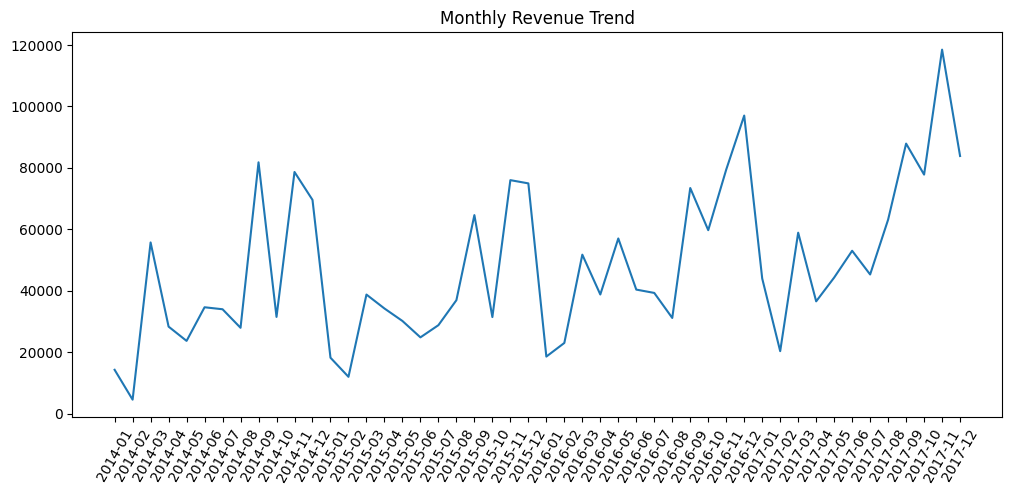

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_summary["Order Month"], monthly_summary["Revenue"])
plt.xticks(rotation=60)
plt.title("Monthly Revenue Trend")
plt.show()

## Step 9 — Exporting Clean Dataset for Visualization

In the final step, the fully cleaned and enriched dataset is exported as a new file for visualization purposes.

The exported dataset:
- Contains validated and engineered business metrics
- Is optimized for direct consumption in Tableau
- Serves as a single source of truth for dashboard development

This ensures consistency between data preparation and final business reporting.

In [42]:
df.to_csv("../data/retail_sales_clean.csv",index=False)
pd.read_csv("../data/retail_sales_clean.csv").shape

(9994, 27)

### Why This Notebook Matters

This notebook demonstrates an end-to-end data preparation workflow that mirrors real-world business analytics processes.

It highlights the ability to:
- Translate raw transactional data into business-ready datasets
- Apply logical validation aligned with business rules
- Engineer metrics that directly support strategic decision-making

This approach ensures that insights presented in the final dashboard are both accurate and actionable.